In [1]:
import tensorflow
import os
import tarfile
import cv2
import h5py
import numpy as np
# import imageio
from PIL import Image
import matplotlib.pyplot as plt
from PIL import ImageOps
import pandas as pd
import csv
from numpy import savez_compressed
from numpy import load
import glob
from skimage.util import img_as_ubyte
import train_with_pred
import tensorflow as tf
from tempfile import TemporaryFile


/home/ecbm4040/miniconda3/envs/envTF113/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ecbm4040/miniconda3/envs/envTF113/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ecbm4040/miniconda3/envs/envTF113/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ecbm4040/miniconda3/envs/

In [2]:
train_data1 = load(os.getcwd()+'/data/final_train_image_cropped.npz', allow_pickle=True)
train = train_data1['arr_0']

val_data1 = load(os.getcwd()+'/data/final_validation_image_cropped.npz', allow_pickle=True)
val = val_data1['arr_0']

val_data = load(os.getcwd()+'/data/final_validation_label.npz', allow_pickle=True)
val_label = val_data['arr_0']

train_data = load(os.getcwd()+'/data/final_train_label.npz', allow_pickle=True)
train_label = train_data['arr_0']

test_data1 = load(os.getcwd()+'/data/final_test_image_cropped.npz', allow_pickle=True)
test = test_data1['arr_0']

test_data = load(os.getcwd()+'/data/final_test_label.npz', allow_pickle=True)
test_label = test_data['arr_0']

In [3]:
conv_featmap = (48, 64, 128, 160, 192, 192, 192, 192)
fc_units = (3072, 3072)
conv_kernel_size = (5, 5, 5, 5, 5, 5, 5, 5)
pooling_size = (2, 2, 2, 2, 2, 2, 2, 2)
stride_size = (2, 1, 2, 1, 2, 1, 2, 1)

tf.reset_default_graph()
# tf.debugging.set_log_device_placement(True)
train_with_pred.train(train, train_label, val, val_label,test, test_label,
                conv_featmap=conv_featmap,
                fc_units=fc_units,
                conv_kernel_size=conv_kernel_size,
                pooling_size=pooling_size,
                l2_norm=0,
                seed=888,
                learning_rate=3e-3,
                epoch=400,
                batch_size=1024,
                verbose=False,
                stride_size = stride_size,
                drop_rate=0             
                )

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use keras.layers.batch_normalization instead.
Instructions for updating:
Use keras.layers.dropout instead.
Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Use tf.cast instead.
number of batches for training: 26
Instructions for updating:
Use tf.cast instead.
epoch 1 
7.1815515
0.0
epoch 2 
6.929515
0.0016467066
Best validation accuracy! iteration:40 accuracy: 0.0016467066016048193
prediction:  0.0015968063
epoch 3 
6.731906
0.0013473054
epoch 4 
6.5761847
0.0025748503
Best validation accuracy! iteration:80 accuracy: 0.0025748503394424915
prediction:  0.0030439121
6.12177
0.005902481
Best validation accuracy! iteration:100 accuracy: 0.00590248079970479
prediction:  0.007447605
epoch 5 
5.859278
0.009913506
Best validation accuracy! iteration:120 accuracy: 0.009913505986332893
prediction:  0.011377245
epoch 6 
5.779609
0.015459989
Best validation accura

[0.6882858, 0.68832105]

In [2]:
from numpy import loadtxt
loss_array = loadtxt('loss_array.csv', delimiter=',')

print(loss_array)

[7.18155146e+00 6.92951488e+00 6.73190594e+00 6.57618475e+00
 6.12176991e+00 5.85927820e+00 5.77960920e+00 5.14183044e+00
 5.16355896e+00 4.38940620e+00 3.91580367e+00 3.92582011e+00
 3.33806992e+00 2.88347220e+00 2.63579774e+00 2.06213427e+00
 2.05154753e+00 1.83798361e+00 1.79845023e+00 1.62393546e+00
 1.46900713e+00 1.47101653e+00 1.25964165e+00 1.51938105e+00
 1.19131541e+00 1.30575979e+00 1.12390435e+00 1.12641263e+00
 8.95789802e-01 9.24060881e-01 7.23260045e-01 8.05386662e-01
 6.59289062e-01 6.15751326e-01 6.00575030e-01 5.48059404e-01
 5.40255725e-01 5.12258172e-01 4.70102638e-01 4.84177947e-01
 4.86510932e-01 5.37485003e-01 5.70393145e-01 4.24037009e-01
 4.29197431e-01 4.56128120e-01 4.78559881e-01 4.87810969e-01
 2.65873164e-01 2.08261386e-01 1.83621541e-01 1.18772328e-01
 1.82516813e-01 1.45549938e-01 2.75506407e-01 2.43420556e-01
 8.46827030e-02 1.11536145e-01 1.30983070e-01 9.14497375e-02
 1.81420073e-01 2.42533207e-01 1.35245383e-01 1.72154441e-01
 2.22297072e-01 1.050004

In [3]:
valid_acc_array = loadtxt('valid_acc_array.csv', delimiter=',')

print(valid_acc_array)

[0.         0.00164671 0.00134731 0.00257485 0.00590248 0.00991351
 0.01545999 0.0236527  0.03141716 0.04170483 0.05595651 0.07231252
 0.09203333 0.11401197 0.13784653 0.16237868 0.18558045 0.2080929
 0.22877674 0.2487053  0.26628283 0.28250328 0.29761872 0.31210911
 0.32608613 0.33912989 0.35092169 0.3613829  0.37139902 0.38081732
 0.38954633 0.39777657 0.40578842 0.41374943 0.42106533 0.42782262
 0.43428355 0.44031662 0.44620359 0.45168364 0.45681801 0.46188733
 0.46662578 0.47113067 0.47560051 0.47973827 0.48383233 0.48763764
 0.49148124 0.49537626 0.49902317 0.50247818 0.50588626 0.50928712
 0.51247692 0.51562929 0.51860332 0.52148801 0.52406663 0.52652133
 0.52916014 0.53154105 0.53386885 0.53614849 0.53830922 0.54058397
 0.54278237 0.54496872 0.54713017 0.54925913 0.55125147 0.55304283
 0.55488676 0.55669421 0.55847079 0.5602982  0.56208116 0.56375873
 0.56534868 0.56700677 0.56848001 0.5700078  0.57153118 0.57309383
 0.57454193 0.57591856 0.57724023 0.5786283  0.57999998 0.58132

In [4]:
pre_array = loadtxt('pre_array.csv', delimiter=',')

print(pre_array)

[0.00159681 0.00304391 0.00744761 0.01137725 0.01818862 0.02763045
 0.03439371 0.04807052 0.06390718 0.08079749 0.10249501 0.12524183
 0.15004277 0.17376247 0.19700599 0.21845721 0.23872255 0.25784746
 0.27430388 0.29014114 0.30480403 0.3191812  0.33291543 0.34546107
 0.35617226 0.3663229  0.37636334 0.38527256 0.3937026  0.40174812
 0.40994573 0.41751042 0.42452008 0.43119332 0.4372713  0.44323921
 0.44910181 0.4542492  0.45940495 0.4643749  0.46888366 0.4735204
 0.47773203 0.48179972 0.48585328 0.48956874 0.49345684 0.49730539
 0.50074553 0.50422388 0.50771534 0.5108971  0.51411068 0.51715022
 0.52011603 0.52286482 0.52527618 0.52786463 0.5304541  0.53268874
 0.53508306 0.53715903 0.53953969 0.54169506 0.54394168 0.54604298
 0.54822344 0.55030376 0.55218351 0.55394912 0.55586535 0.55760604
 0.55939066 0.56119758 0.56297272 0.56460261 0.5662387  0.56773287
 0.56926459 0.57078987 0.57232732 0.57386011 0.57527268 0.57661325
 0.57796097 0.57932752 0.58069885 0.58199894 0.5832901  0.58452

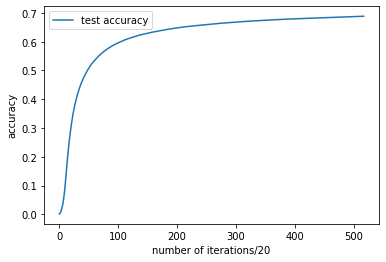

In [10]:
import matplotlib.pyplot as plt
plt.plot(pre_array)
plt.ylabel('accuracy')
plt.xlabel('number of iterations/20')
plt.legend(['test accuracy'], loc='upper left')
plt.show()